In [123]:
import pandas as pd

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) <br>Regularization & Cross Validation Implementation <br>in Scikit-Learn

Week 3 | Day 4

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Implement LASSO and Ridge regressions in sklearn
- Explain the importance of hold-out data
- Explain the different cross val strategies
- Perform cross validation scoring
- Make cross validation predictions

## Regularization Recap

- What is regularization?
- Why do we use it?

## Key Takeaway:
<br>
__A model that fits well is not necessarily a model that predicts well.__

- Regularization ensures we don't overfit our training data. 
- Our ultimate goal in modeling is to be able to predict using new/future data.

## Example: Modeling a chair

- Partner up and create a model of a chair
- Your model should include a checklist of positive attributes
- If an example passes these it will be considered a chair
- If it fails it will not be considered a chair
- I will provide a test set and we will see which team builds the best model

## Modeling success = predictive success

To ensure this, we do a couple of things:
    
- Regularization: enforces simple models by penalizing complexity (as measured by beta magnitudes)

- Cross Validation: ensures our model performs well on unseen data

## We're now going to see how we can implement both regularization and cross validation in sklearn

## Load the data

In [124]:
# import the sklearn datasets library
from sklearn import datasets

# load the boston dataset
boston = datasets.load_boston()

In [125]:
# see what we're dealing with...
type(boston)

sklearn.datasets.base.Bunch

## Let's examine it further

In [126]:
# further examination shows it functions as a python dict
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

## Treating it like a dict

In [127]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [128]:
boston.data.shape

(506, 13)

In [129]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

## Load it into a DataFrame

In [130]:
# set the X matrix/DataFrame (IVs) and use the feature names as cols
df_X = pd.DataFrame(boston.data, columns=boston.feature_names)

# set the y vector/Series (DV)
df_y = boston.target

## Set X matrix (independent variables) and y (dependent variable)

In [131]:
# save feature matrix and target vector as X and y by convention
X = df_X
y = df_y

In [132]:
X.shape

(506, 13)

In [133]:
y.shape

(506,)

## Fit a standard linear regression

In [134]:
from sklearn import linear_model

# import our estimator
lr = linear_model.LinearRegression()

In [135]:
# fit our model using our data and target
lr_model = lr.fit(X, y)

## Get the r<sup>2</sup>

In [136]:
from sklearn.metrics import r2_score

y_true = y
y_pred = lr_model.predict(X)

lr_r2 =  r2_score(y_true=y_true, y_pred=y_pred)

In [137]:
lr_r2

0.74060774286494269

## Plot our predictions vs. actual values

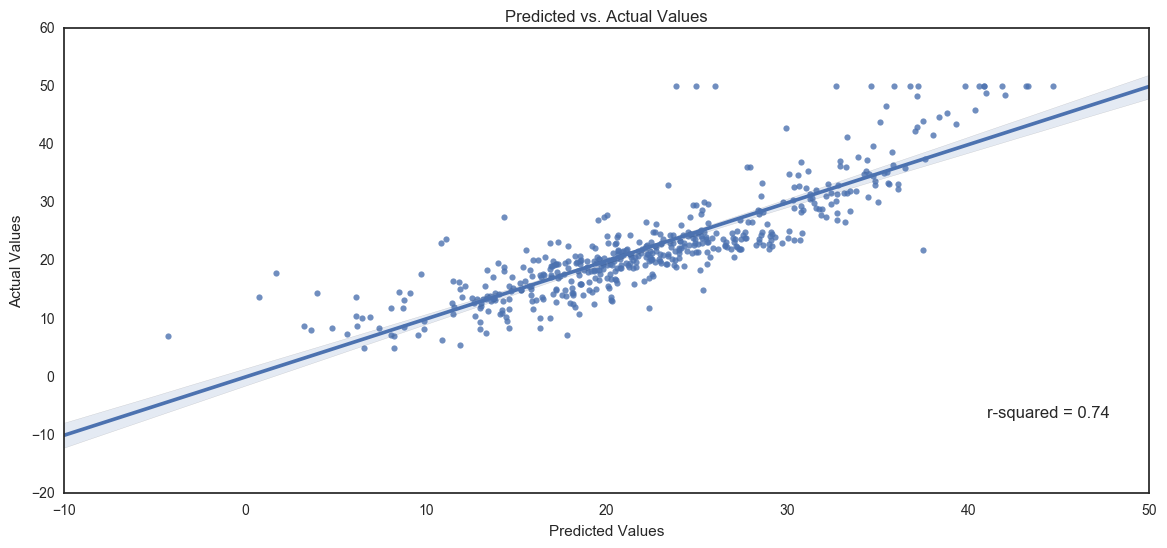

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

ax = sns.regplot(y_pred, y_true)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(14)
plt.annotate('r-squared = ' + str(round(lr_r2,2)), xy=(41,-7), fontsize=12)
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Predicted vs. Actual Values');

## Get the coefficients (betas)

In [139]:
# each feature has an associated coefficient
len(lr_model.coef_)

13

In [140]:
# we can retrieve those
lr_model.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

## Mean abs. value of the coefficients

In [141]:
abs(lr_model.coef_).mean()

2.1343319598991339

In [142]:
lr_model.coef_.max()

3.8047524602580065

## Let's re-model it using regularization

In [143]:
# we'll use LASSO, aka L1
lasso = linear_model.Lasso(alpha=1)

In [144]:
# next we fit
lasso_model = lasso.fit(X, y)

## Get the r<sup>2</sup>

In [145]:
y_true_lasso = y
y_pred_lasso = lasso_model.predict(X)

lasso_r2 =  r2_score(y_true=y_true_lasso, y_pred=y_pred_lasso)

In [146]:
lasso_r2

0.682549461750665

## Get the coefficients (betas)

In [147]:
len(lasso_model.coef_)

13

In [148]:
lr_model.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

## Mean of absolute value of the coefficients

In [149]:
abs(lasso_model.coef_).mean()

0.27089386015469102

In [150]:
lasso_model.coef_.max()

0.94678566695975275

# What did we just see?
- We fit a standard linear regression and a regularized linear regression (LASSO - L1)
- We saw that the mean of the absolute value of the coefficients fell with regularization
- We saw that the r<sup>2</sup> also fell in the penalized/regularized regression -- on our training data

## Exercise

- Create a function that accepts a list of alpha values (Use 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, and 1 at a minimum).
- The function should fit a LASSO regression for each of the alphas.
- Save each alpha parameter in a dictionary as the key and use the mean absolute value of the beta coefficients as the value (this should be a single value as seen above).
- Return this dictionary from the function.
- What happens to the magnitude of the betas as alpha increases?
- Bonus: create a scatterplot from of the alphas vs. the mean absolute betas

[ 4.36570697 -5.86902313  1.85433297] [ 1.85374611  1.84846831  1.79607931  1.31108773  0.65993387  0.01124815
  0.35101681]


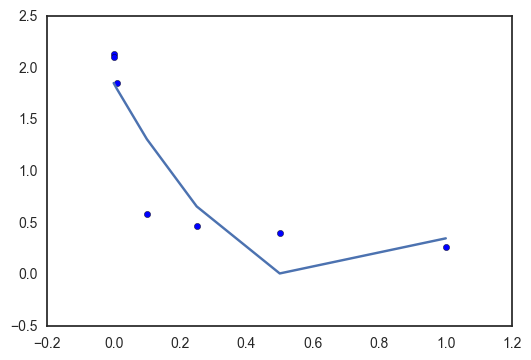

In [151]:
import numpy as np
import matplotlib.pyplot as plt
def fit(a,X,Y):
    d={}
    for alpha in a:
        lasso = linear_model.Lasso(alpha)
        lasso_model = lasso.fit(X, y)
        d[alpha]=abs(lasso_model.coef_).mean()
    return d
alpha=[0.0001,0.001,0.01,0.1,0.25,0.5,1]
r=fit(alpha,X,y)

#As alpha increases, the mean absolute beta decreases
l1=r.keys()
l1.sort()
l2=[r[x] for x in l1]


fit=np.polyfit(l1,l2,deg=2)
fit_n = np.polyval(fit, l1)
#fit_n=np.poly1d(fit)
s=np.linspace(0,1,0.05)

print fit,fit_n
plt.scatter(l1,l2)

plt.plot(l1,fit_n)
plt.show()

In [152]:

print l1, type(l2)

[0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 1] <type 'list'>


# Cross Validation

<br><br>

- Cross validation is the process that ensures the model we fit generalizes to data outside of the data our model was trained on.
- The two most common flavors are train/test split and k-fold cv.
- Let's see it implemented now.

## Train test split (holdout)

With a holdout set, we split our data into two parts. Typically this split is 2/3 train and 1/3 testing.

![](http://i.imgur.com/DFdGUNG.png)

## How we implement a train test split in sklearn

[sklearn train_test_split documentation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [153]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [154]:
print 'Length of X_train: ' + str(len(X_train))
print 'Length of y_train: ' + str(len(y_train))
print
print 'Length of X_test: ' + str(len(X_test))
print 'Length of y_test: ' + str(len(y_test))

Length of X_train: 339
Length of y_train: 339

Length of X_test: 167
Length of y_test: 167


## Let's fit again on our training data and test it on our test data

In [155]:
lasso_tts = linear_model.Lasso(alpha=.01)
tts_model = lasso_tts.fit(X_train, y_train)

tts_lasso_r2 =  r2_score(y_true=y_test, y_pred=tts_model.predict(X_test))

print 'original lasso r2:', lasso_r2
print 'tts lasso r2:     ', tts_lasso_r2

original lasso r2: 0.682549461751
tts lasso r2:      0.736176840371


## K-fold Procedure

In [156]:
from IPython.core.display import Image
Image(PATH + 'kfold.png')

NameError: name 'PATH' is not defined

## K-fold

![](http://i.imgur.com/wnruaYT.png)

## Check: Is 2-fold the same as a 50:50 train test split? Why or why not?

## Check: Will two different 50:50 (or x:y) splits produce the same model score?

## K-Fold implementation in sklearn

The easiest way to do so is with:
[cross_val_score( )](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)

**But, which scoring metric does cross_val_score return?**

>By default cross_val_score uses the scoring provided in the given estimator, which is usually the simplest appropriate scoring method. E.g. for most classifiers this is accuracy score and for regressors this is r2 score.<br><br>
If you want to use a different scoring method you can pass a scorer to cross_val_score using the scoring= keyword. You can choose anything from sklearn.metrics.scorer (but it may not work if it is not appropriate to your setting [classification / regression])
-- [Stack Overflow](http://stackoverflow.com/questions/25006369/what-is-sklearn-cross-validation-cross-val-score)

## Let's now use cross_val_score on our two models:
1. First in our standard linear model: lr
2. Then in our regularizied model: lasso

## Get Cross Val Score - Using 5 folds

In [203]:
from sklearn.model_selection import cross_val_score
# we pass in our estimator, lr, and our data and target
sum(cross_val_score(lr, X, y, n_jobs=1, cv=7))

3.1769409951787138

In [191]:
# testing this time with the lasso estimator
sum(cross_val_score(lasso, X, y, n_jobs=1, cv=7))

2.8478540392994547

## Get the mean of the 5 runs

In [186]:
cross_val_score(lr, X, y, n_jobs=1, cv=7).mean()

0.45384871359695911

In [173]:
cross_val_score(lasso, X, y, n_jobs=1, cv=5).mean()

0.43176891192320488

## Change cross val scoring metric -  MSE

In [197]:
cross_val_score(lr, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error')

/Users/thomas/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/thomas/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/thomas/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/thomas/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

array([-12.48065021, -26.09620267, -33.11995587, -80.83305378, -33.58435565])

In [215]:
cross_val_score(lr, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error').mean()

-37.222843637138425

In [216]:
cross_val_score(lasso, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error')

array([-15.1506561 , -33.33108327, -53.28544689, -56.60390369, -19.29364303])

In [217]:
cross_val_score(lasso, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error').mean()

-35.53294659598334

## Some models have their own CV version

RidgeCV implements cross validation on a ridge regression with various alphas

In [198]:
# testing eight different alpha levels
rcv = linear_model.RidgeCV(alphas=
                           (.001, .001, .01, .1, .5, 1, 5, 10),
                           store_cv_values=True,
                          )

## Fitting our RidgeCV model

In [199]:
# fit the ridge cv model
rcv_model = rcv.fit(X, y)

## Get r<sup>2</sup>

In [201]:
rcv_r2 =  rcv_model.score(X, y)

In [202]:
rcv_r2

0.74060726698734058

## Retrieve the best alpha

In [347]:
# this is the alpha that cv showed to have the best r^2
rcv_model.alpha_

0.01

In [348]:
# we can retrieve all the beta coeffs
len(rcv_model.coef_)

13

In [349]:
# here we can see their mean
abs(rcv_model.coef_).mean()

2.1251605697910847

## Get CV fold scores

Gives us the MSE (or whatever our scoring metric was) for each alpha for all samples

In [350]:
rcv_model.cv_values_.shape

(506, 8)

In [352]:
pd.DataFrame(rcv_model.cv_values_, columns=rcv.alphas).head(3)

,0.001,0.001,0.01,0.1,0.5,1.0,5.0,10.0
0,37.206996,37.206996,37.251234,37.669189,39.115423,40.334784,43.937305,45.550298
1,11.979066,11.979066,11.955850,11.739225,11.029528,10.485599,9.358038,9.262169
2,17.396187,17.396187,17.400312,17.439275,17.574329,17.689758,18.088168,18.377968


## Using cross_val_predict

[cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict)

Returns for each sample, the prediction that was obtained for that element when it was in the test set. Only cross-validation strategies that assign all elements to a test set exactly once can be used.

## Let's use it on our linear model

In [359]:
from sklearn.cross_validation import cross_val_predict

cvp_lr_preds = cross_val_predict(lr, X, y, cv=5)

In [360]:
cvp_lr_preds.shape

(506,)

In [362]:
pd.DataFrame(cvp_lr_preds, columns=['y_hat']).head(3)

,y_hat
0,30.207942
1,24.790116
2,30.294281


## On the regularized model

In [363]:
cvp_rcv_preds = cross_val_predict(rcv_model, X, y, cv=5)

In [364]:
cvp_rcv_preds.shape

(506,)

In [366]:
pd.DataFrame(cvp_rcv_preds, columns=['y_hat']).head(3)

,y_hat
0,30.212783
1,24.784849
2,30.293271


## Get r<sup>2</sup>

In [371]:
cvp_lr_r2 =  r2_score(y_true=y, y_pred=cvp_lr_preds)
cvp_lr_r2

0.55965243464550907

In [372]:
cvp_rcv_r2 =  r2_score(y_true=y, y_pred=cvp_rcv_preds)
cvp_rcv_r2

0.56115300367094623

## Plot the two

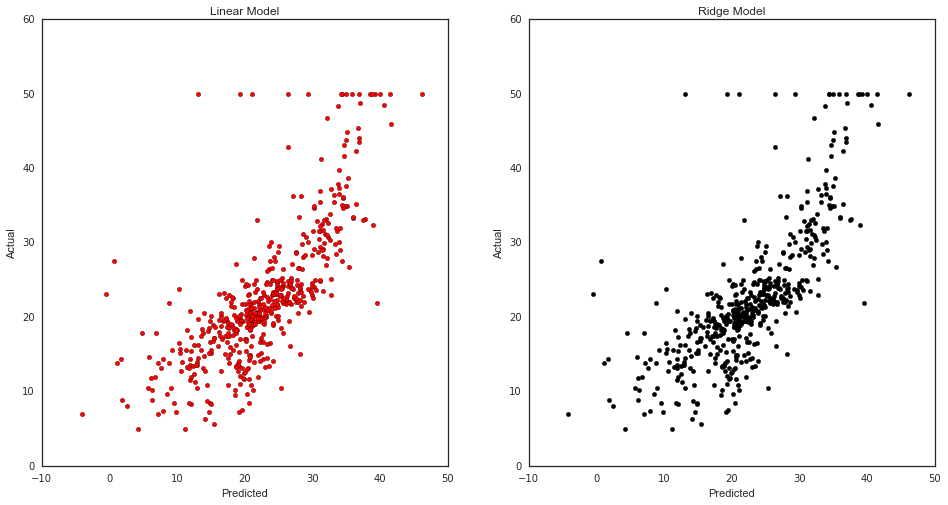

In [244]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

axes[0].scatter(cvp_lr_preds, y, c='red')
axes[1].scatter(cvp_rcv_preds, y, c='k')

axes[0].set_title('Linear Model')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

axes[1].set_title('Ridge Model')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted');

## Independent Practice

Using the diabetes dataset given below:
1. Fit a linear model on all the data
2. Get the r-squared value
3. Now implement train_test_split using sklearn
4. Get the r-squared value on your test set. How does it compare?
5. Rerun the steps above using a LASSO and Ridge model. What are the default alphas?
6. Retrieve the coefficients of both. How do they compare?
7. Now use RidgeCV and LASSOCV to find the optimal alphas. What are they?
8. Finally, use cross_val_score on all three models.

In [444]:
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetes = datasets.load_diabetes()
dd = pd.DataFrame(diabetes.data, columns=columns)
dy = diabetes.target
# Take a look at the data again
dd.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
